In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import imutils
import zipfile

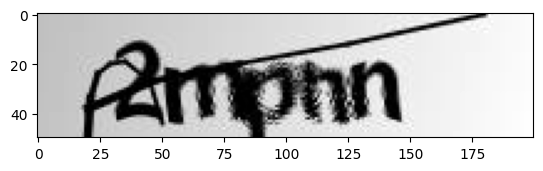

In [3]:
#Load image and convert to grey.
img = cv2.imread('../samples/2mpnn.png', 0)
plt.imshow(img, 'gray')

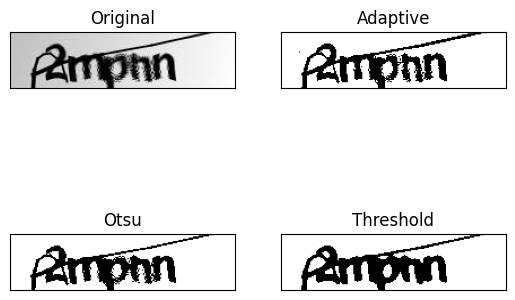

In [4]:
# From RGB to BW
# Adaptive thresholding
th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)

# Otsu thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu thresholding with Gaussian Blur
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#Plot
titles = ['Original', 'Adaptive', 'Otsu', 'Gaussian + Otsu']
images = [img, th, th2, th3]
for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.title('Threshold')
plt.show()

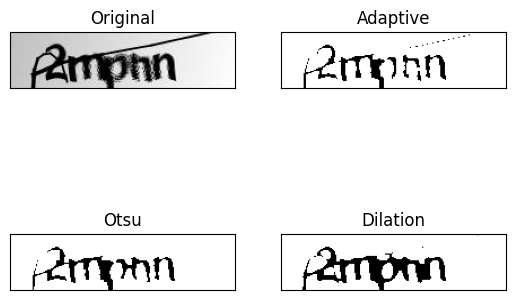

In [5]:
kernel = np.ones((3,3), np.uint8)
dilation = cv2.dilate(th, kernel, iterations=1)
dilation2 = cv2.dilate(th2, kernel, iterations=1)
dilation3 = cv2.dilate(th3, kernel, iterations=1)

titles2 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images2 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images2[i], 'gray')
    plt.title(titles2[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Dilation')
plt.show()

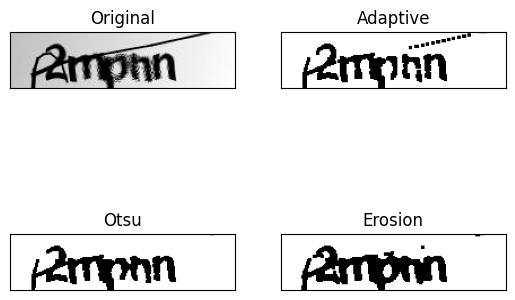

In [6]:
erosion = cv2.erode(dilation, kernel, iterations=1)
erosion2 = cv2.erode(dilation2, kernel, iterations=1)
erosion3 = cv2.erode(dilation3, kernel, iterations=1)

titles3 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images3 = [img, erosion, erosion2, erosion3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])
    
plt.title('Erosion')
plt.show()

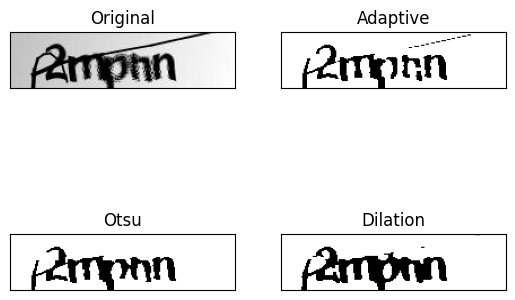

In [7]:
kernel = np.ones((3,1), np.uint8)
dilation = cv2.dilate(erosion, kernel, iterations=1)
dilation2 = cv2.dilate(erosion2, kernel, iterations=1)
dilation3 = cv2.dilate(erosion3, kernel, iterations=1)

titles4 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images4 = [img, dilation, dilation2, dilation3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images4[i], 'gray')
    plt.title(titles4[i])
    plt.xticks([]), plt.yticks([])

plt.title('Dilation')
plt.show()

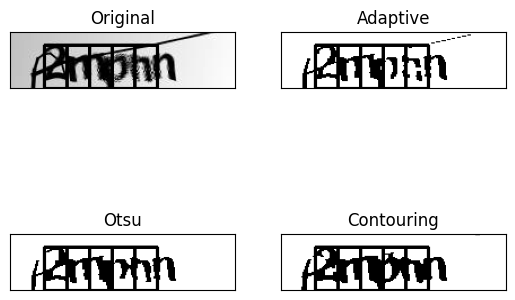

In [8]:
#Get the individual letters.
x, y, w, h = 30, 12, 20, 38
for  i in range(5):
    # get the bounding rect
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(dilation3, (x, y), (x + w, y + h), (0, 255, 0), 2)
    x += w

titles3 = ['Original', 'Adaptive', "Otsu", 'Gaussian + Otsu']
images3 = [img, dilation, dilation2, dilation3] #img, opening, opening2, opening3]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(images3[i], 'gray')
    plt.title(titles3[i])
    plt.xticks([]), plt.yticks([])

plt.title('Contouring')
plt.show()